<a href="https://colab.research.google.com/github/aeron7/alice_blue_pro/blob/main/AliceBlue_Sample_Program_6_Coding_and_Plotting_Exponential_Moving_Average_Indicator_of_Infosys_Using_Python_By_Unofficed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Let's install the Library
!pip install alice_blue

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/krishnavelu/alice_blue.git (to revision develop) to /tmp/pip-req-build-ypx8fep2
  Running command git clone -q https://github.com/krishnavelu/alice_blue.git /tmp/pip-req-build-ypx8fep2
  Running command git checkout -b develop --track origin/develop
  Switched to a new branch 'develop'
  Branch 'develop' set up to track remote branch 'develop' from 'origin'.
     |████████████████████████████████| 4.0 MB 15.8 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
  Created wheel for alice-blue: filename=alice_blue-2.0.3-py2.py3-none-any.whl size=35040 sha256=291812c016c03deea8b0692a11a75d689f49004b902c106e98d1f4b89bfcd65d
  Stored in directory: /tmp/pip-ephem-wheel-cache-g6m2dy4q/wheels/f6/c8/7c/5fa1c2f0d20829ef7bf42b48667da66482e0971bf2f1cb4dd0
Successfully built alice-blue


In [ ]:
#Copying the base code to get the alice function

#Importing AliceBlue Library
from alice_blue import *

#Only Replace it with your credentails
#Follow https://unofficed.com/how-to-activate-the-api-in-alice-blue-for-automated-trading/ for generating api_ID and api_Secret 

#Only Replace it with your credentails
username    = "enter_your_user_name" 
password    = "enter_your_password" 
twoFA       = "enter_byear"
app_id      = "enter_app_id"
api_secret  = "enter_api_secret"

#Generating Session ID
session_id = AliceBlue.login_and_get_sessionID(username=username,password=password,twoFA=twoFA,app_id=app_id,api_secret=api_secret)

#Generate an Alice object using the session_id
alice = AliceBlue(username = username, session_id = session_id, master_contracts_to_download=['NSE', 'BSE','NFO','MCX'])

In [ ]:
import datetime
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 

payload = alice.historical_data(alice.get_instrument_by_symbol("NSE", "INFY-EQ"),datetime.datetime(2022, 9, 15),datetime.datetime(2022, 9, 20),HistoricalDataType.Minute)
df = pd.DataFrame.from_records(payload["result"])
df

,volume,high,low,time,close,open
0,13692.0,1435.30,1434.70,2022-09-15 11:22:59,1435.25,1434.85
1,17590.0,1435.95,1435.25,2022-09-15 11:23:59,1435.80,1435.30
2,18878.0,1436.00,1435.00,2022-09-15 11:24:59,1435.85,1435.80
3,15943.0,1436.45,1435.40,2022-09-15 11:25:59,1435.40,1435.95
4,10990.0,1436.00,1435.30,2022-09-15 11:26:59,1435.70,1435.40
...,...,...,...,...,...,...
995,58053.0,1390.15,1389.70,2022-09-19 15:25:59,1389.75,1390.10
996,40059.0,1390.70,1389.65,2022-09-19 15:26:59,1390.15,1390.00
997,35528.0,1390.45,1389.95,2022-09-19 15:27:59,1390.15,1390.00
998,30427.0,1391.00,1390.15,2022-09-19 15:28:59,1390.80,1390.20


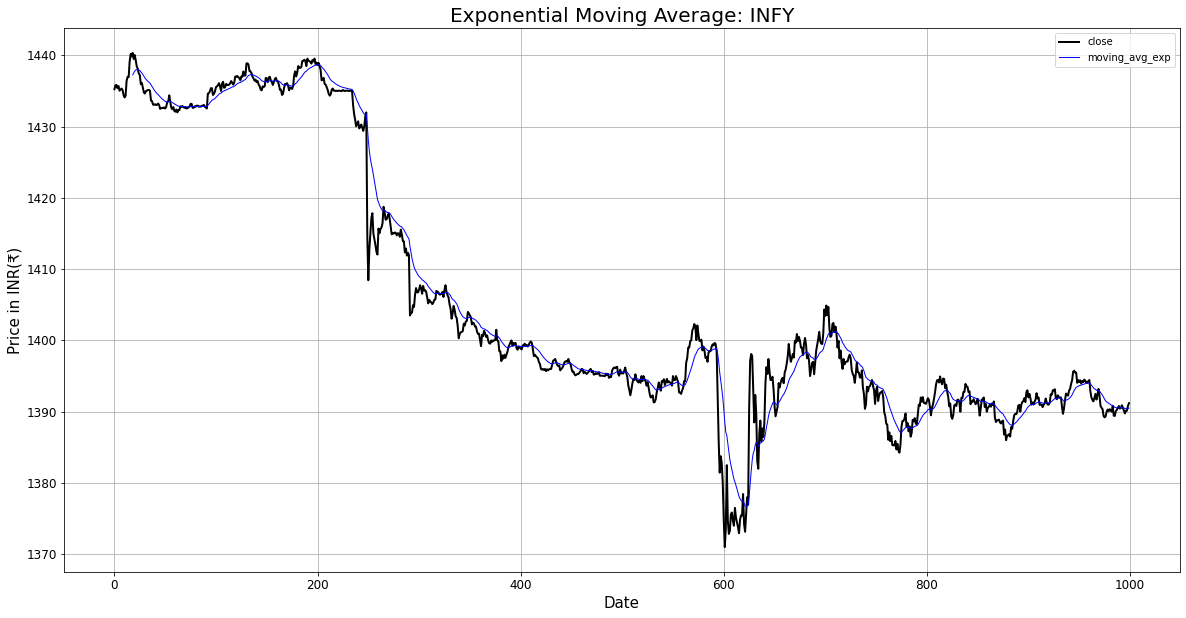

In [ ]:
#Let's write the function for Exponential Moving Average 

def plot_ema(stock_symbol, df, MA_period = 20):

  df['moving_avg_exp'] = df["close"].ewm(span=MA_period,min_periods=MA_period-1).mean()

  # plotting and visualization of simple moving average
  df['close'].plot(c = 'k', figsize = (20,10), lw = 2, fontsize = 12)
  df['moving_avg_exp'].plot(c = 'b', figsize = (20, 10), lw = 1)

  # show plot
  plt.title('Exponential Moving Average: {}'.format(stock_symbol), fontsize = 20)
  plt.ylabel('Price in INR(₹)',fontsize = 15 )
  plt.xlabel('Date', fontsize = 15 )
  plt.legend()
  plt.grid()
  plt.show()

plot_ema("INFY", df)